In [1]:
from celestial_body_trajectories import celestial_trajectory
from cmb_footprint import footprint
import ephem
import healpy as hp
import numpy as np
import pylab as pl

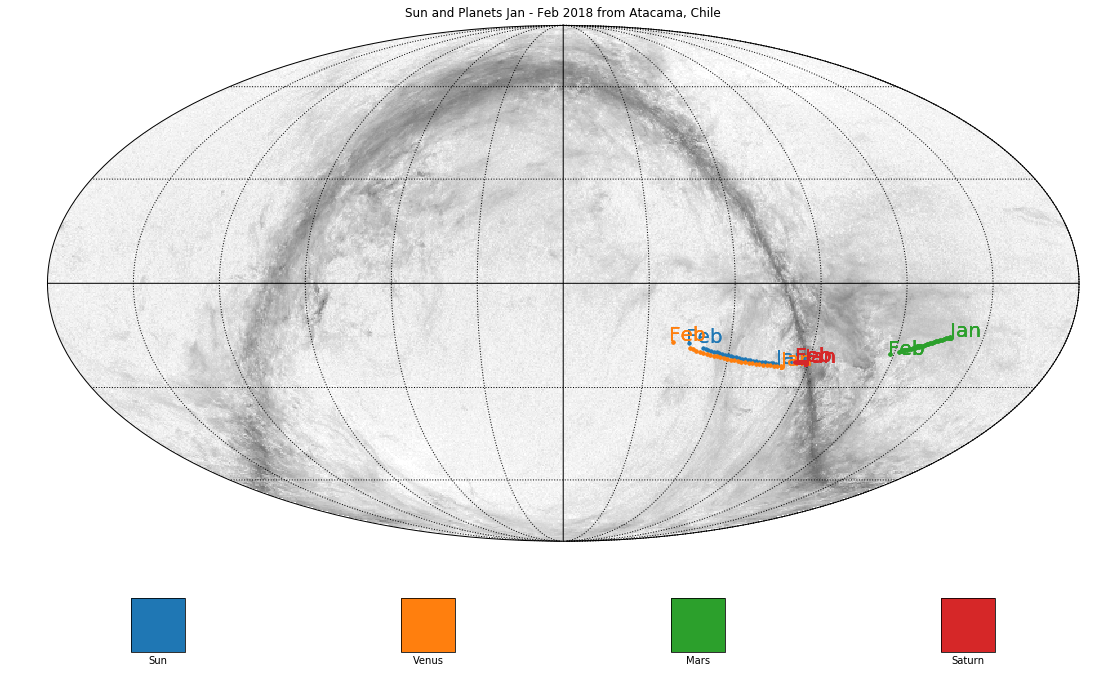

In [3]:
## Example of trajectories for the Sun and different planets between Jan 1st and Feb 1st 2018.
nside = 128
fig = pl.figure(figsize=(15, 15))

## Plot the background
fp = footprint.SurveyStack('PLANCK-DUSTPOL', fignum=1,
                           title='Sun and Planets Jan - Feb 2018 from Atacama, Chile', 
                           projection='mollweide', coord_plot='C', rot=[0,0],
                           config='/Users/julien/Documents/lib/cmb_footprint/footprint.cfg')

## Pick up a few objects
for pos, body in enumerate([ephem.Sun(), ephem.Venus(), ephem.Mars(), ephem.Saturn()]):
    ## Compute the trajectory over the year
    traj = celestial_trajectory(body, '-67:46.816', '-22:56.396', 5200, 2018)
    thetaphi = np.transpose(traj.thetaphi)
    
    ## Empty map to get the legend
    fp.superimpose_hpxmap(np.zeros(12*nside**2), 
                          label=body.name, color='C{}'.format(pos), coord_in='C')
    
    ## Plot the trajectory for 1 month
    hp.projscatter(thetaphi[0][:28], thetaphi[1][:28], 
                   lonlat=False, coord='C', color='C{}'.format(pos), marker='.')
    
    ## Add labels
    labels = [''] * 28
    labels[0] = 'Jan'
    labels[1] = 'Feb'
    for theta, phi, label in zip(thetaphi[0][::28], thetaphi[1][::28], labels):
        hp.projtext(theta, phi, label, color='C{}'.format(pos), fontsize=20)
        
pl.show()